In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('./Phase 1 Dataset Hackathon.xlsx', sheet_name=None)
data.keys()

odict_keys(['Leather Safety Gloves', 'Ladies Kurta', 'Impact Drill'])

In [3]:
# list all unique measurement units
for key in data:
    print(data[key]['Unit'].unique(), '\n')

['Pair' 'Piece' 'pack' 'Unit' 'Pack' 'Unit/Onwards' 'Pair(s)' 'unit' 'Set'
 'Pieces']
['Piece' 'dollar' 'Packet' 'piece' 'Meter' 'Piece(s)' 'Set' 'Per piece'
 'Unit' 1 '1pc' 'Box' '170 per peice' 'Unstitch' 'Barrel' 'Carton' 'peice'
 'Pieces' 'Sets' 'Unit(s)' 'one' 'Bag' 'Selfie Kurtis' 'Pack' 'Pair'
 'Pound' 'Peice' '1piece' 'No' 'Kilogram' 'Number' "40' Container" 'pack'
 '100 pic' 'Year' "20' Container" 'Pcs' 'Piece(s) Onwards' 'One' 'kurtI'
 'Ounce' 'onwards' '10-10000' 'per piese' 'Day' 'Set(s)' '12 units' '1pis'
 'Onwards' 'One peace' 'Set(S)' 'Pair piece' 'Ounce(s)' 'Packet(s)'
 'Single' 'one pcs' 'Pc' '4 pcs' '4 units' 5 'set' 'kurti' 'pcs' 'pices'
 'Pics' 'single piece' 'pi' 'per piece' 'Kurti' 'one unit' '1 piece'
 '1 pice' 'Suit' 'pair piece' 10 'pieces' '1pcs' '1 pc' '3 set' 'Xl size'
 '1000 per unit' '1pcd' 'Psc' 'Gram' 'Rs' 'in' '1 pcs' 'Feet' 'onepices']
['Piece' 'Piece(s)' 'pack' 'unit' 'Number' 'Unit' 'Pack' '1nos' 'Unit(s)'
 'kit' 'Set' 'Pc_Onwards' 'ONWARDS' 'Kit']


In [4]:
# ---------------------------------------------------------
# IDEA- add numeric entries into relevant existing sets and check whether first entry is numeric.
# This will help scale the price by that number for max/min calculation.
# FLAW- '170 per peice', '1000 per unit'
#
# ASSUMPTION- Price listed is per unit, if product is sold in multiple units.
# So now, multiple unit items can be listed in existing lists without needed to affect max,min
# ---------------------------------------------------------

unit_list = []
unit_list.append(('pair', ['Pair', 'Pair(s)', 'Pair piece', 'pair piece']))
# ASSUMPTION: Kurti = 1 piece, Onwards = Piece
unit_list.append(('pc', ['Piece', 'Pieces', 'piece', 'Piece(s)', 'Per piece', '1', '1pc', 'peice',
         'one', 'Peice', '1piece', 'No', 'Number', 'Pcs', 'Piece(s) Onwards',
         'One', 'kurtI', 'per piese', '1pis', 'One peace', 'Single', 'one pcs', 'Pc', 
         'pcs', 'pices', 'Pics', 'single piece', 'pi', 'per piece', 'Kurti', '1 piece',
         '1 pice', 'Suit', 'pieces', '1pcs', '1 pc', '1pcd', 'Psc', '1 pcs', 'onepices', 
         '1nos', 'Pc_Onwards', 'onwards', 'Onwards', 'ONWARDS', 'Selfie Kurtis', 'Xl size']))
unit_list.append(('pack', ['pack', 'Pack', 'Packet', 'Bag', 'Packet(s)']))
unit_list.append(('unit', ['Unit', 'Unit/Onwards', 'unit', 'Unit(s)', 'one unit']))
unit_list.append(('set', ['Set', 'Set(S)', 'set', 'Set(s)', 'Sets']))
unit_list.append(('kit', ['kit', 'Kit']))
unit_list.append(('unk', ['40\' Container', '20\' Container']))
unit_list.append(('kg', ['Kilogram']))
unit_list.append(('g', ['Gram']))
unit_list.append(('lb', ['Pound']))
unit_list.append(('oz', ['Ounce(s)', 'Ounce']))
unit_list.append(('m', ['Meter']))
unit_list.append(('inch', ['in']))
unit_list.append(('yard', ['Year']))
unit_list.append(('ft', ['Feet']))
unit_list.append(('unk', ['Unstitch']))
unit_list.append(('carton', ['Carton']))
unit_list.append(('barrel', ['Barrel']))
unit_list.append(('$', ['dollar']))
unit_list.append(('Rs', ['Rs']))

for unit in unit_list:
    print(unit)

miscl = ['170 per peice', '4 pcs', '5', '10', '100 pic', '10-10000', '1000 per unit', '3 set', '12 units', '4 units']

('pair', ['Pair', 'Pair(s)', 'Pair piece', 'pair piece'])
('pc', ['Piece', 'Pieces', 'piece', 'Piece(s)', 'Per piece', '1', '1pc', 'peice', 'one', 'Peice', '1piece', 'No', 'Number', 'Pcs', 'Piece(s) Onwards', 'One', 'kurtI', 'per piese', '1pis', 'One peace', 'Single', 'one pcs', 'Pc', 'pcs', 'pices', 'Pics', 'single piece', 'pi', 'per piece', 'Kurti', '1 piece', '1 pice', 'Suit', 'pieces', '1pcs', '1 pc', '1pcd', 'Psc', '1 pcs', 'onepices', '1nos', 'Pc_Onwards', 'onwards', 'Onwards', 'ONWARDS', 'Selfie Kurtis', 'Xl size'])
('pack', ['pack', 'Pack', 'Packet', 'Bag', 'Packet(s)'])
('unit', ['Unit', 'Unit/Onwards', 'unit', 'Unit(s)', 'one unit'])
('set', ['Set', 'Set(S)', 'set', 'Set(s)', 'Sets'])
('kit', ['kit', 'Kit'])
('unk', ["40' Container", "20' Container"])
('kg', ['Kilogram'])
('g', ['Gram'])
('lb', ['Pound'])
('oz', ['Ounce(s)', 'Ounce'])
('m', ['Meter'])
('inch', ['in'])
('yard', ['Year'])
('ft', ['Feet'])
('unk', ['Unstitch'])
('carton', ['Carton'])
('barrel', ['Barrel'])
('$',

In [5]:
split_data = {}
for key in data:
    split_data[key] = []
    for unit in unit_list:
        split_data[key].append(data[key][data[key].Unit.isin(unit[1])])

In [6]:
def price_boxplot(df):
    df.boxplot('Price')

def plot_z_score(df):
    test = (df.Price - df.Price.mean()) / df.Price.std()
    (np.abs(test)).plot.line()

def plot_modified_z_score(df):
    MAD = np.median(np.abs(df.Price - df.Price.median())) # median absolute deviation
    test = 0.6745*(df.Price - df.Price.median()) / df.Price.std()
    (np.abs(test)).plot.line()
    
def remove_outliers(df):     
    # Remove outliers based on modified Z-scores
    if df.empty or (len(df) == 1):
        return df
    MAD = np.median(np.abs(df.Price - df.Price.median()))
    test = 0.6745*(df.Price - df.Price.median()) / df.Price.std()
    return df[(test <= 1.52) & (test >= -1.52)] # experimentally chosen value

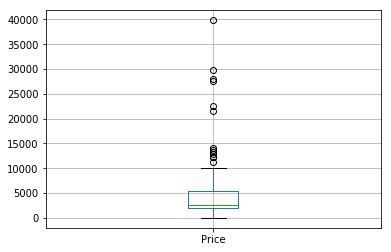

In [7]:
price_boxplot(split_data['Impact Drill'][1])

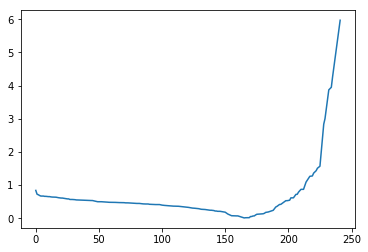

In [8]:
plot_z_score(split_data['Impact Drill'][1])

In [9]:
for key in split_data:
    for idx in range(len(split_data[key])):
        split_data[key][idx] = remove_outliers(split_data[key][idx])

Empty DataFrame
Columns: [Category Name, Unit, Price]
Index: []
    Category Name      Unit  Price
665  Ladies Kurta  Kilogram    250
     Category Name  Unit  Price
4057  Ladies Kurta  Gram   1600
    Category Name   Unit  Price
506  Ladies Kurta  Pound    250
     Category Name Unit  Price
4071  Ladies Kurta   in   1650
     Category Name  Unit  Price
1081  Ladies Kurta  Year    330
     Category Name  Unit  Price
4151  Ladies Kurta  Feet   2000
    Category Name      Unit  Price
233  Ladies Kurta  Unstitch    180
    Category Name    Unit  Price
251  Ladies Kurta  Carton    190
  Category Name    Unit  Price
2  Ladies Kurta  dollar      7
     Category Name Unit  Price
4068  Ladies Kurta   Rs   1650
             Category Name Unit  Price
128  Leather Safety Gloves  Set    600
Empty DataFrame
Columns: [Category Name, Unit, Price]
Index: []
Empty DataFrame
Columns: [Category Name, Unit, Price]
Index: []
Empty DataFrame
Columns: [Category Name, Unit, Price]
Index: []
Empty DataFrame
Co

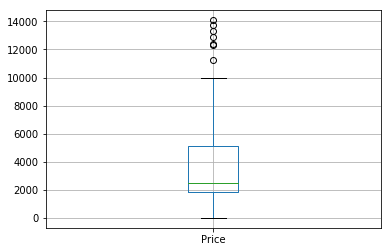

In [10]:
price_boxplot(split_data['Impact Drill'][1])

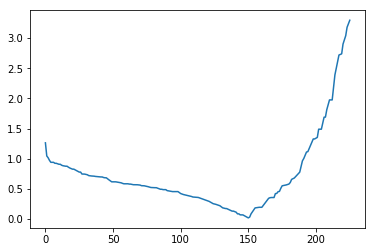

In [11]:
plot_z_score(split_data['Impact Drill'][1])

In [12]:
for key in split_data:
    print(key)
    for idx in range(len(split_data[key])):
        if not split_data[key][idx].empty:
#             print(split_data[key][idx].Unit.iloc[0])
            print("{} - min:{}, max:{}".format(split_data[key][idx].Unit.iloc[0], split_data[key][idx].Price.min(), split_data[key][idx].Price.max()))
    print('\n')

Ladies Kurta
Pair - min:249, max:1750
Piece - min:1, max:5000
Packet - min:55, max:2600
Unit - min:110, max:5050
Set - min:100, max:2290
40' Container - min:295, max:1100
Kilogram - min:250, max:250
Gram - min:1600, max:1600
Pound - min:250, max:250
Ounce - min:381, max:1050
Meter - min:100, max:400
in - min:1650, max:1650
Year - min:330, max:330
Feet - min:2000, max:2000
Unstitch - min:180, max:180
Carton - min:190, max:190
Barrel - min:180, max:250
dollar - min:7, max:7
Rs - min:1650, max:1650


Leather Safety Gloves
Pair - min:10, max:250
Piece - min:40, max:300
pack - min:51, max:2210
Unit - min:70, max:4587
Set - min:600, max:600


Impact Drill
Piece - min:2, max:14081
pack - min:1069, max:27579
unit - min:1199, max:37848
Set - min:4895, max:4895
kit - min:2243, max:5690




In [13]:
# df = split_df[3]
# MAD = np.median(np.abs(df.Price - df.Price.median()))
# test = 0.6745*(df.Price - df.Price.median())/df.Price.std()
# df['Z-score'] = test
# df
# # split_df[3]# = df[(test <= 1.52) & (test >= -1.52)]

In [14]:
# Univariate Method
# Choose a cleaning parameter (cp)
# Reject all the values which lie outside the range (median - cp, median + cp)

In [15]:
# Multivariate Method
# Train a model and calculate error for all values
# Choose a acceptable error (ae)
# Reject all the values having error
# in the range (0 - ae, 0 + ae)

In [16]:
# Problem: Univariate (single feature: price) point (single data pts lying far from dist.) outliers